In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
data = pd.read_csv("EPL22.csv",encoding='latin1')
data.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [ ]:
data.describe()

,Age,MP,Starts,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
count,687.000000,691.000000,691.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,24.490539,15.173661,12.098408,15.255941,1.895795,1.361974,1.742230,0.153565,0.188300,2.451554,...,0.203443,1.928755,1.784982,1.300916,3.088828,0.137216,0.092619,0.230037,0.130147,0.222967
std,4.900421,12.954948,12.057790,11.260210,3.255050,2.037348,2.934154,0.675447,0.786336,2.563289,...,0.535085,2.982733,2.673862,1.711252,4.055039,0.259142,0.295461,0.405768,0.254656,0.402157
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,4.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.100000,0.300000,0.020000,0.010000,0.050000,0.012500,0.050000
50%,24.000000,14.000000,9.000000,14.700000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.100000,0.800000,0.750000,0.650000,1.600000,0.060000,0.060000,0.130000,0.060000,0.130000
75%,28.000000,28.000000,22.000000,23.900000,2.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,0.280000,2.500000,2.400000,1.900000,4.300000,0.170000,0.120000,0.330000,0.160000,0.310000
max,39.000000,38.000000,38.000000,38.000000,23.000000,13.000000,23.000000,6.000000,7.000000,11.000000,...,11.250000,21.800000,17.100000,11.200000,27.400000,4.480000,6.500000,6.500000,4.480000,6.500000


In [ ]:
data.isna().sum()

Player         0
Team           0
Nation         3
Pos            0
Age            4
MP             0
Starts         0
Min          145
90s          144
Gls          144
Ast          144
G-PK         144
PK           144
PKatt        144
CrdY         144
CrdR         144
Gls.1        145
Ast.1        145
G+A          145
G-PK.1       145
G+A-PK       145
xG           145
npxG         145
xA           145
npxG+xA      145
xG.1         145
xA.1         145
xG+xA        145
npxG.1       145
npxG+xA.1    145
dtype: int64

In [ ]:
dependent_columns = ['Min', '90s', 'Gls', 'Ast', 'G-PK','PK','PKatt','CrdY','CrdR','Gls.1','Ast.1','G+A','G-PK.1','G+A-PK','xG' ,'npxG','xA' ,'npxG+xA' ,'xG.1','xA.1' ,'xG+xA','npxG.1','npxG+xA.1']

data.loc[data['MP'] == 0, dependent_columns] = data.loc[data['MP'] == 0, dependent_columns].fillna(0)

In [ ]:
data

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
data.isna().sum()

Player       0
Team         0
Nation       3
Pos          0
Age          4
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

In [ ]:
#drop missing values
data = data.dropna()
data.isna().sum()

Player       0
Team         0
Nation       0
Pos          0
Age          0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

In [ ]:
#Total Goals
Tot_Gls= math.trunc(data['Gls'].sum())
print('Total Goals Scored in 2021-22 Season: ',Tot_Gls)

Total Goals Scored in 2021-22 Season:  1037


In [ ]:
#Total Assists
Tot_Ast= math.trunc(data['Ast'].sum())
print('Total Assists in 2021-22 Season: ',Tot_Ast)

Total Assists in 2021-22 Season:  745


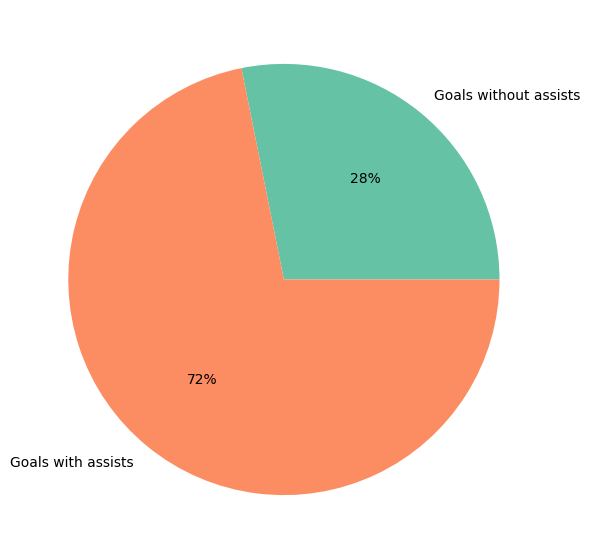

In [ ]:
#Goals with/without assists
plt.figure(figsize=(14,7))
goal_data=[Tot_Gls - Tot_Ast, Tot_Ast]
labels= ['Goals without assists','Goals with assists']
color= sns.color_palette('Set2')
plt.pie(goal_data, colors=color, labels=labels, autopct='%.0f%%')
plt.show()

In [ ]:
#Total Penalties Attempted
Tot_Pen_atmpt= math.trunc(data['PKatt'].sum())
print('Total penalties attempted in 2021-22 Season: ',Tot_Pen_atmpt)

Total penalties attempted in 2021-22 Season:  103


In [ ]:
#Total Penalties Scored
Tot_Pen_Scr= math.trunc(data['PK'].sum())
print('Total penalties scored in 2021-22 Season: ',Tot_Pen_Scr)

Total penalties scored in 2021-22 Season:  84


In [ ]:
#Pie Chart for Penalties
Pen_miseed = Tot_Pen_atmpt-Tot_Pen_Scr

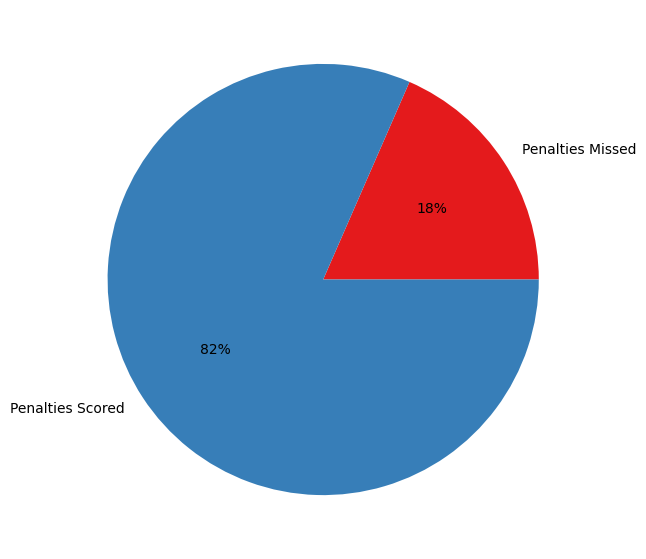

In [ ]:
plt.figure(figsize=(14,7))
Pen_data=(Pen_miseed, Tot_Pen_Scr)
labels= ['Penalties Missed','Penalties Scored']
color= sns.color_palette('Set1')
plt.pie(Pen_data, colors=color, labels=labels, autopct='%.0f%%')
plt.show()

In [ ]:
#Total Yellow cards
Tot_YL= math.trunc(data['CrdY'].sum())
print('Total Yellow Cards shown in 2021-22 Season: ',Tot_YL)

Total Yellow Cards shown in 2021-22 Season:  1341


In [ ]:
#Total Red cards
Tot_Red = math.trunc(data['CrdR'].sum())
print('Total Red Cards shown in 2021-22 Season: ',Tot_Red)

Total Red Cards shown in 2021-22 Season:  43


In [ ]:
#Total Cards
overall_card = Tot_YL+Tot_Red
print('Overall total Cards shown in 2021-22 Season:',overall_card)

Overall total Cards shown in 2021-22 Season: 1384


In [ ]:
#Unique Positions
data["Pos"].unique()

array(['FW,MF', 'DF', 'GK', 'MF', 'MF,DF', 'MF,FW', 'FW', 'DF,MF',
       'DF,FW', 'FW,DF'], dtype=object)

In [ ]:
#Total FW players

data[data['Pos']=='FW']

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
15,Pierre-Emerick Aubameyang,Arsenal,ga GAB,FW,32.0,14,12,"1,037",11.5,4.0,...,0.43,5.8,4.1,0.8,5.0,0.50,0.07,0.57,0.36,0.43
17,Eddie Nketiah,Arsenal,eng ENG,FW,22.0,21,8,835,9.3,5.0,...,0.65,4.6,4.6,1.4,6.1,0.50,0.16,0.65,0.50,0.65
25,Folarin Balogun,Arsenal,eng ENG,FW,20.0,2,1,70,0.8,0.0,...,0.00,0.3,0.3,0.0,0.3,0.35,0.00,0.35,0.35,0.35
26,Reiss Nelson,Arsenal,eng ENG,FW,21.0,1,0,20,0.2,0.0,...,0.00,0.0,0.0,0.0,0.1,0.16,0.18,0.35,0.16,0.35
31,Mika Biereth,Arsenal,dk DEN,FW,18.0,0,0,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Andriy Yarmolenko,West Ham United,ua UKR,FW,31.0,19,1,316,3.5,1.0,...,0.28,0.8,0.8,0.2,1.0,0.24,0.05,0.29,0.24,0.29
648,Sonny Perkins,West Ham United,eng ENG,FW,17.0,1,0,4,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
663,Raúl Jiménez,Wolverhampton Wanderers,mx MEX,FW,30.0,34,30,"2,631",29.2,6.0,...,0.31,6.6,6.1,2.7,8.7,0.23,0.09,0.32,0.21,0.30
671,Adama Traoré,Wolverhampton Wanderers,es ESP,FW,25.0,20,10,"1,067",11.9,1.0,...,0.08,2.4,2.4,1.7,4.1,0.20,0.15,0.35,0.20,0.35


In [ ]:
#Unique Nations
unq_nat = data["Nation"].unique()
np.size(unq_nat) #Number of total unique nations

66

In [ ]:
data['Team'].unique()

array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton & Hove Albion',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [ ]:
# Assign default color
default_color = 'gray'

# Assign color dictionary
colors= {'Arsenal':'firebrick', 'Aston Villa':'maroon', 'Brentford':'pink', 'Brighton & Hove Albion':'cornflowerblue',
       'Burnley':'purple', 'Chelsea':'midnightblue', 'Crystal Palace':'blue', 'Everton':'navy', 'Leeds United':'ivory',
       'Leicester City':'mediumblue', 'Liverpool':'crimson', 'Manchester City':'skyblue',
       'Manchester United':'red', 'Newcastle United':'black', 'Norwich City':'yellow',
       'Southampton':'darksalmon', 'Tottenham Hotspur':'white', 'Watford':'gold', 'West Ham United':'brown',
       'Wolverhampton Wanderers':'orange'}

# Map colors to teams
data.loc[:,'color'] = data['Team'].map(colors).fillna(default_color)

<ipython-input-32-5394150b97d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'color'] = data['Team'].map(colors).fillna(default_color)


<Axes: title={'center': 'No. of players by Nation'}, xlabel='Nation'>

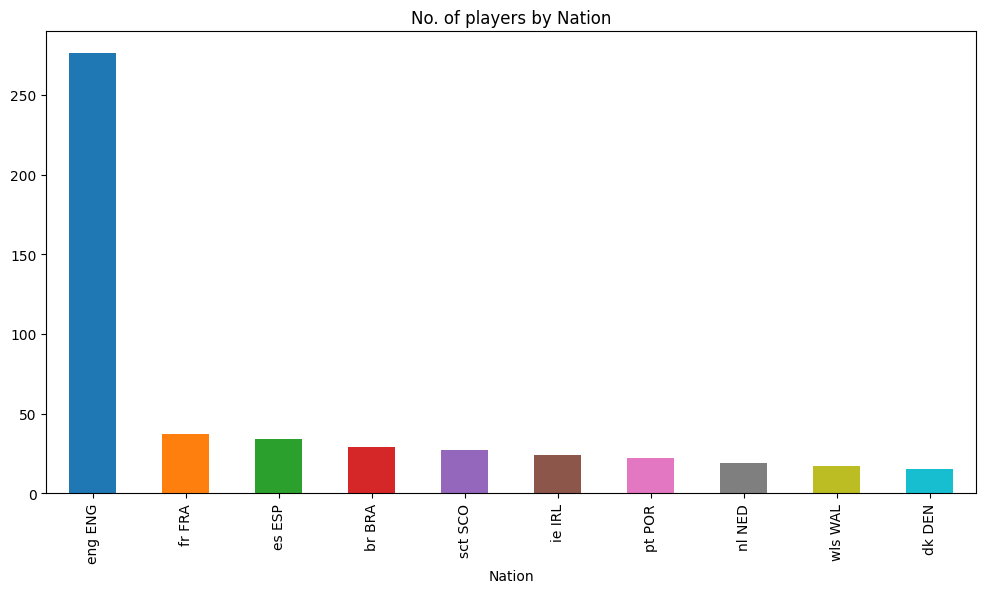

In [ ]:
#Most players from which nation

nationality = data.groupby('Nation').size().sort_values(ascending=False)
nationality.head(10).plot(title= 'No. of players by Nation', kind= 'bar', figsize= (12,6), color=sns.color_palette())

<Axes: title={'center': 'Clubs with the largest squads'}>

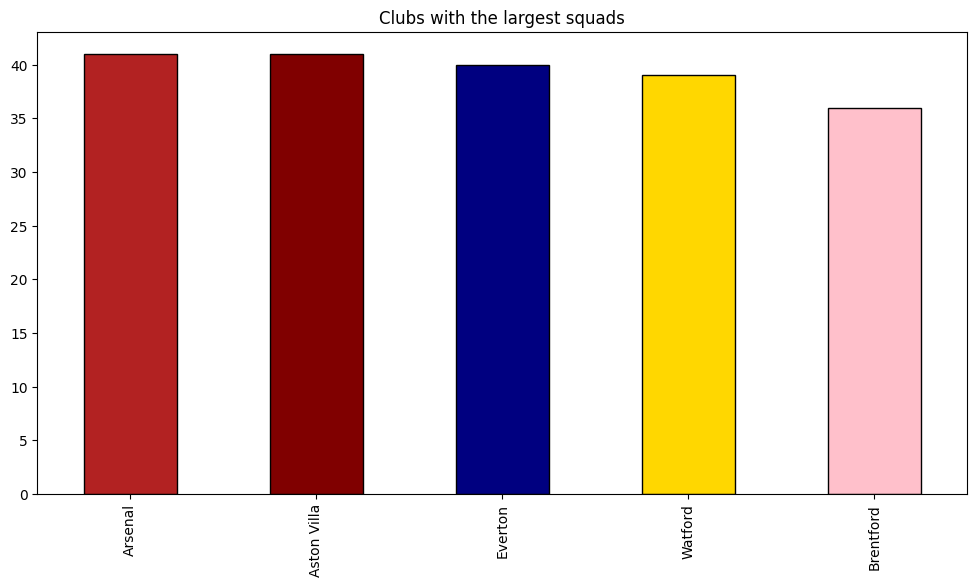

In [ ]:
data['Team'].value_counts().nlargest(5).plot(title= 'Clubs with the largest squads', kind= 'bar', figsize= (12,6), color = [colors[x] for x in data['Team'].value_counts().nlargest(5).index],edgecolor = 'black')

<Axes: title={'center': 'No. of Squad Players in all Premier League Clubs'}>

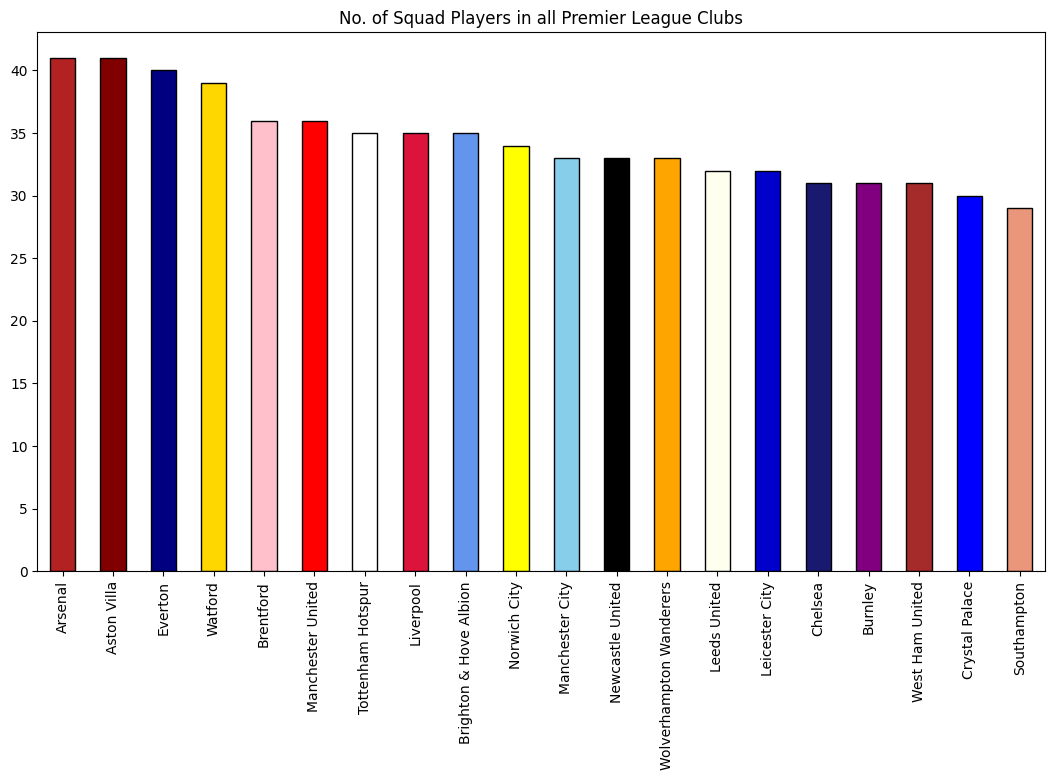

In [ ]:
data['Team'].value_counts().plot(title= 'No. of Squad Players in all Premier League Clubs', kind= 'bar', figsize= (13,7), color = [colors[x] for x in data['Team'].value_counts().index],edgecolor = 'black')

In [ ]:
#Group by Age
under_20= data[data['Age']<20.0]
age20_25= data[(data['Age']>=20.0) & (data['Age']<=25.0)]
age26_30= data[(data['Age']>25.0) & (data['Age']<=30.0)]
above_30= data[data['Age']>30.0]

<function matplotlib.pyplot.show(close=None, block=None)>

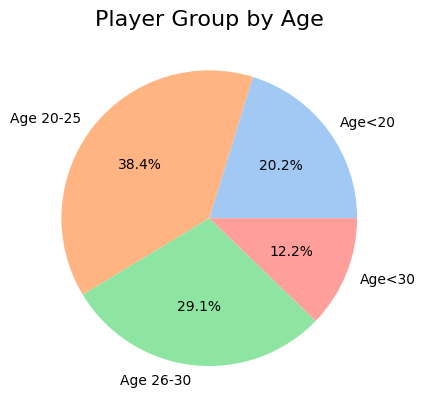

In [ ]:
x= np.array([under_20['Player'].count(), age20_25['Player'].count(), age26_30['Player'].count(), above_30['Player'].count()])
agelabels= ['Age<20','Age 20-25','Age 26-30','Age<30']
plt.title('Player Group by Age', fontsize=16)
color= sns.color_palette('pastel')
plt.pie(x, labels=agelabels, colors=color, autopct='%.1f%%')
plt.show

<Axes: >

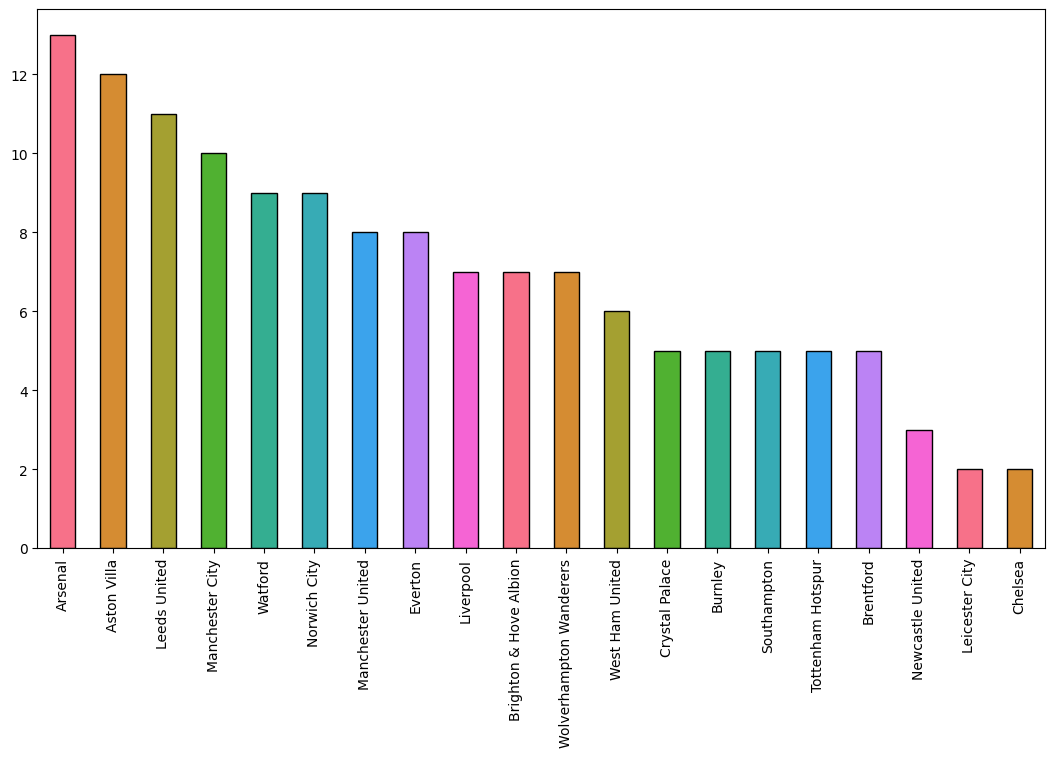

In [ ]:
# Under 20 players in each club
under_20_pl= data[data['Age']<20]
under_20_pl['Team'].value_counts().plot(kind='bar',figsize= (13,7), color = sns.color_palette("husl", 9),edgecolor = 'black')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Brentford'),
  Text(3, 0, 'Brighton & Hove Albion'),
  Text(4, 0, 'Burnley'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Crystal Palace'),
  Text(7, 0, 'Everton'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Leicester City'),
  Text(10, 0, 'Liverpool'),
  Text(11, 0, 'Manchester City'),
  Text(12, 0, 'Manchester United'),
  Text(13, 0, 'Newcastle United'),
  Text(14, 0, 'Norwich City'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham Hotspur'),
  Text(17, 0, 'Watford'),
  Text(18, 0, 'West Ham United'),
  Text(19, 0, 'Wolverhampton Wanderers')])

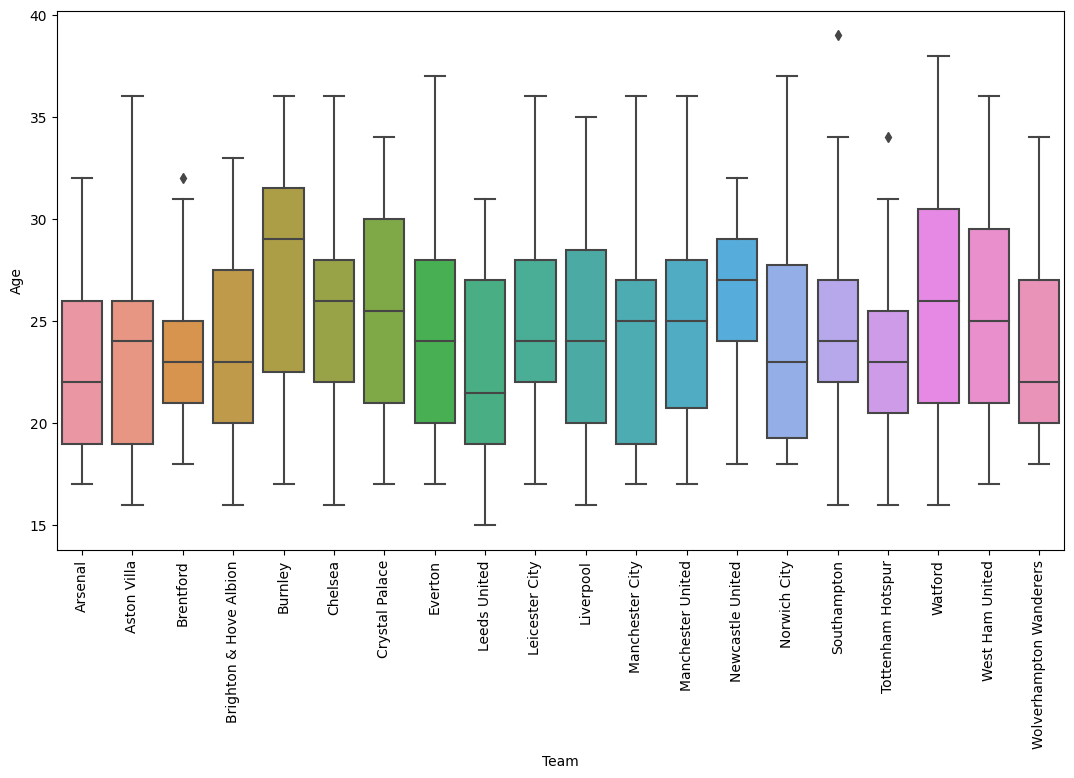

In [ ]:
# Average Age
plt.figure(figsize=(13,7))
sns.boxplot(x='Team',y='Age',data=data)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Total Assists by each Team')

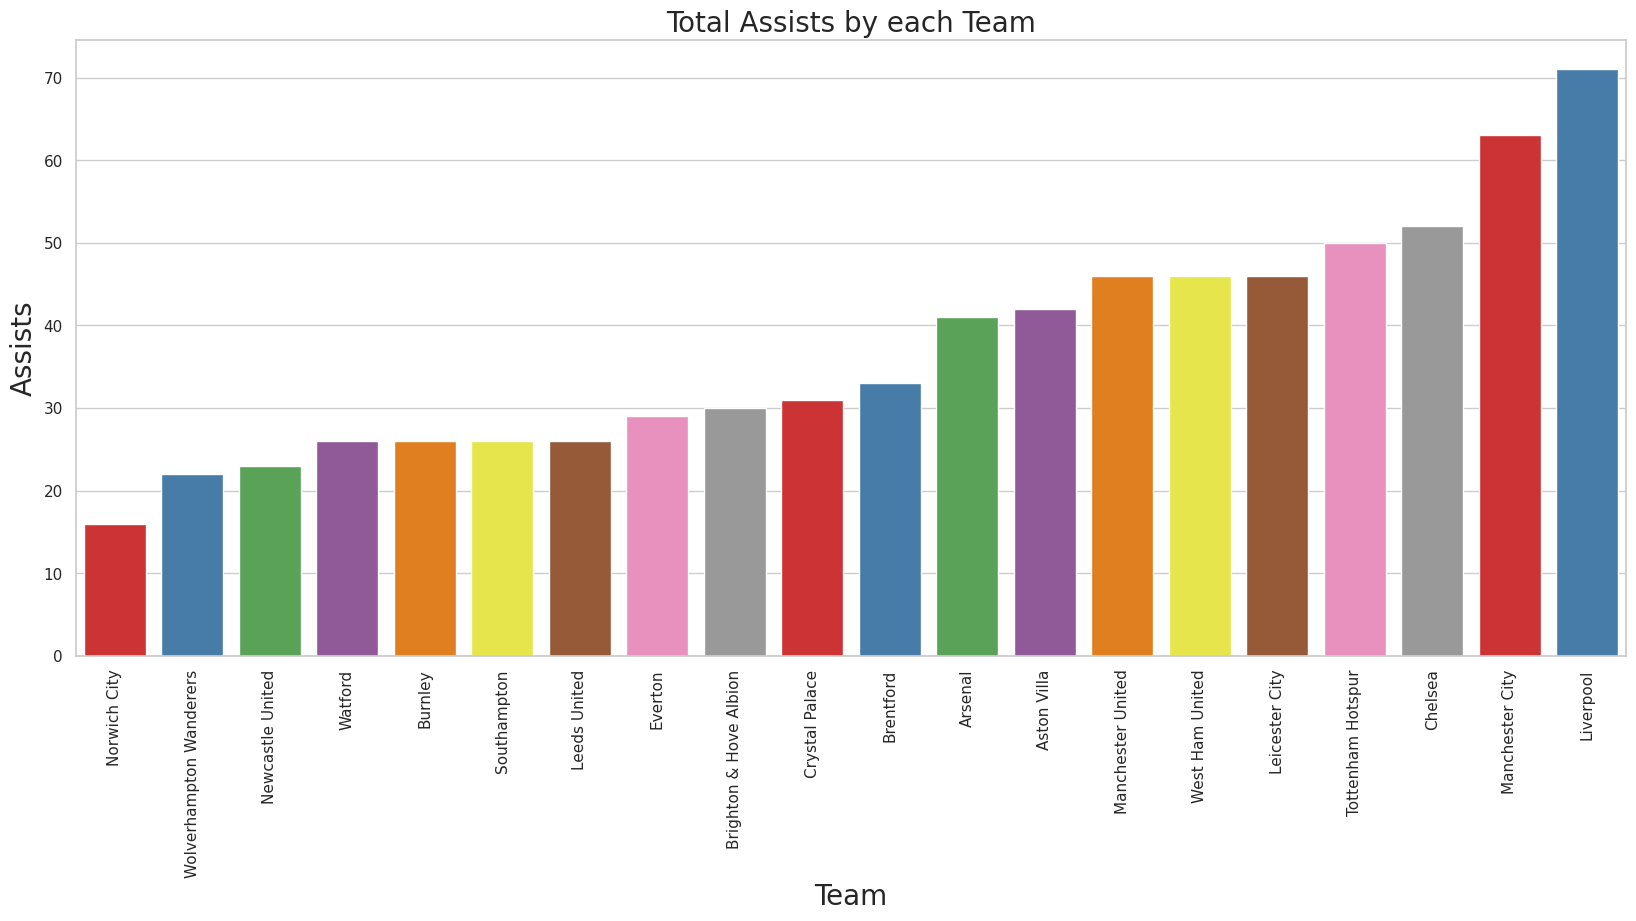

In [ ]:
# Assists by each team
team_asst= pd.DataFrame(data.groupby('Team', as_index= False)['Ast'].sum())
sns.set_theme(style='whitegrid', color_codes= True)
ax = sns.barplot(x='Team', y='Ast', data=team_asst.sort_values(by='Ast'), palette='Set1')
ax.set_xlabel('Team', fontsize=20)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(22,9)
plt.title('Total Assists by each Team', fontsize=20)

In [ ]:
#Top 10 Assist Providers
top_10_ast= data[['Player','Team','Ast','MP']].nlargest(n=10, columns='Ast')
top_10_ast

,Player,Team,Ast,MP
356,Mohamed Salah,Liverpool,13.0,35
353,Trent Alexander-Arnold,Liverpool,12.0,32
188,Mason Mount,Chelsea,10.0,32
323,Harvey Barnes,Leicester City,10.0,32
358,Andrew Robertson,Liverpool,10.0,29
629,Jarrod Bowen,West Ham United,10.0,36
192,Reece James,Chelsea,9.0,26
433,Paul Pogba,Manchester United,9.0,20
553,Harry Kane,Tottenham Hotspur,9.0,37
322,James Maddison,Leicester City,8.0,35


Text(0.5, 1.0, 'Total Goals by each Team')

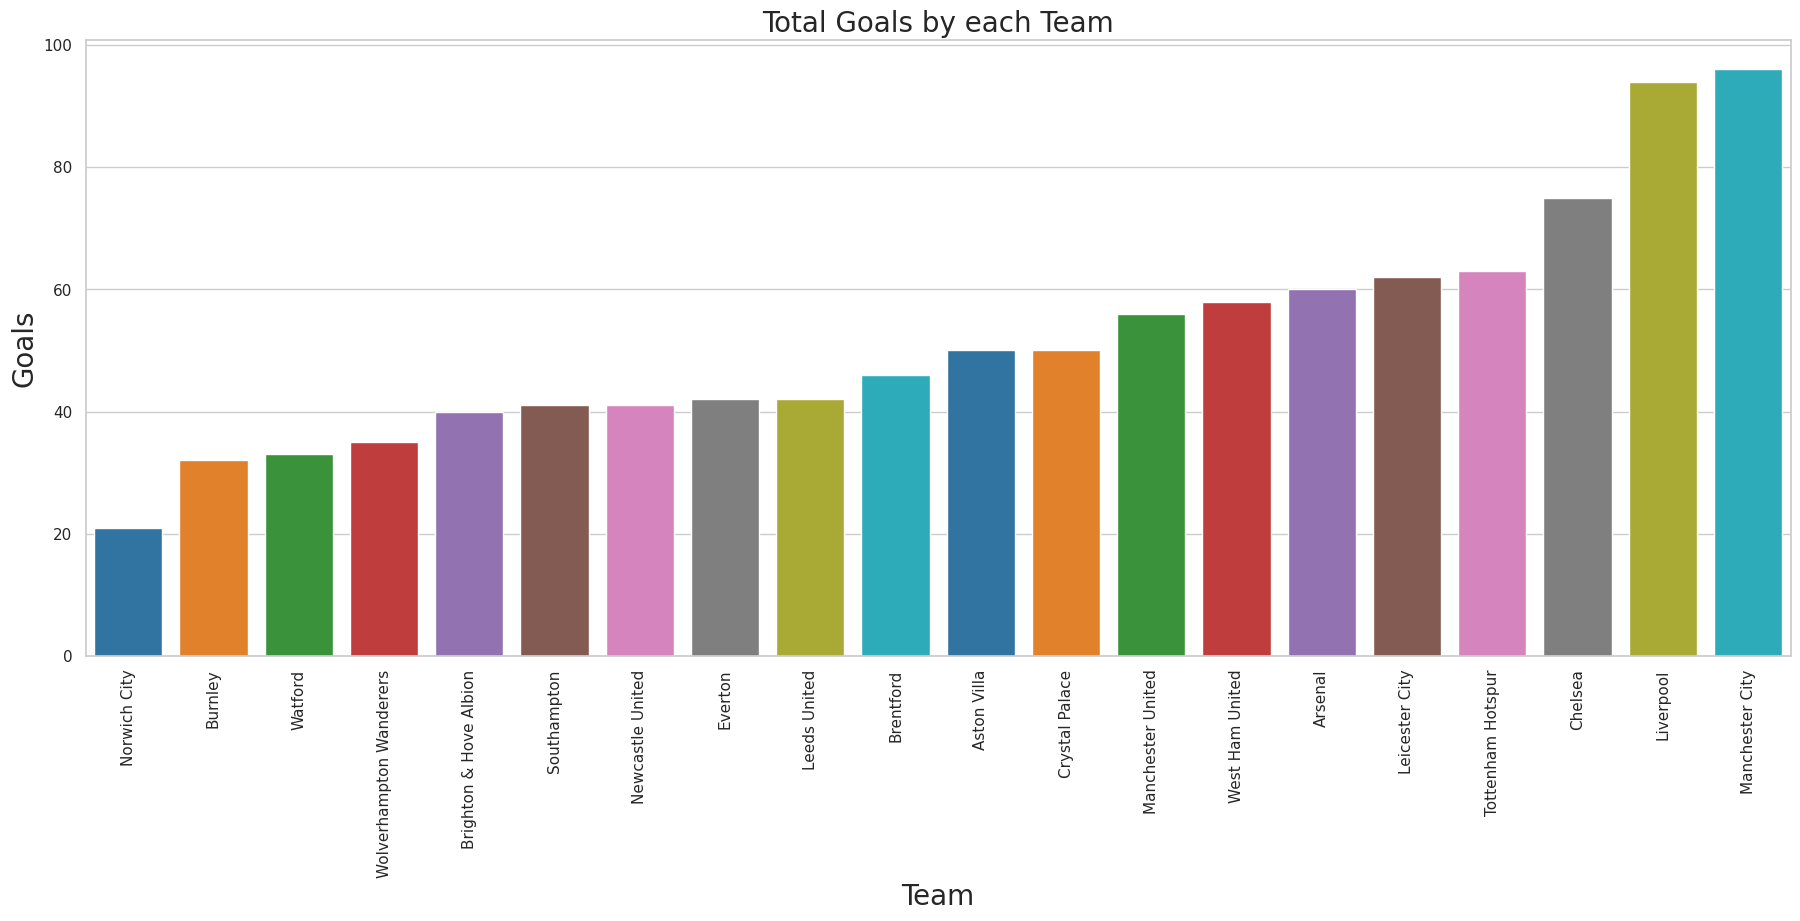

In [ ]:
# Goals by each team
team_gls= pd.DataFrame(data.groupby('Team', as_index= False)['Gls'].sum())
sns.set_theme(style='whitegrid', color_codes= True)
ax = sns.barplot(x='Team', y='Gls', data=team_gls.sort_values(by='Gls'), palette='tab10')
ax.set_xlabel('Team', fontsize=20)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(22,8)
plt.title('Total Goals by each Team', fontsize=20)

In [ ]:
#Top Scorers
top_10_gls= data[['Player','Team','Gls','MP']].nlargest(n=10, columns='Gls')
top_10_gls

,Player,Team,Gls,MP
356,Mohamed Salah,Liverpool,23.0,35
556,Son Heung-min,Tottenham Hotspur,23.0,35
423,Cristiano Ronaldo,Manchester United,18.0,30
553,Harry Kane,Tottenham Hotspur,17.0,37
354,Sadio Mané,Liverpool,16.0,34
328,Jamie Vardy,Leicester City,15.0,25
359,Diogo Jota,Liverpool,15.0,35
392,Kevin De Bruyne,Manchester City,15.0,30
220,Wilfried Zaha,Crystal Palace,14.0,33
394,Raheem Sterling,Manchester City,13.0,30


In [ ]:
#Goals Per Match
data['GoalsPerMatch']= data['Gls'] / data['MP']

top_10_gpm= data[['Player','Team','GoalsPerMatch','MP']].nlargest(n=10, columns='GoalsPerMatch')
top_10_gpm

<ipython-input-69-adc7b45de519>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GoalsPerMatch']= data['Gls'] / data['MP']


,Player,Team,GoalsPerMatch,MP
356,Mohamed Salah,Liverpool,0.657143,35
556,Son Heung-min,Tottenham Hotspur,0.657143,35
328,Jamie Vardy,Leicester City,0.600000,25
423,Cristiano Ronaldo,Manchester United,0.600000,30
392,Kevin De Bruyne,Manchester City,0.500000,30
404,Ferrán Torres,Manchester City,0.500000,4
354,Sadio Mané,Liverpool,0.470588,34
553,Harry Kane,Tottenham Hotspur,0.459459,37
467,Callum Wilson,Newcastle United,0.444444,18
394,Raheem Sterling,Manchester City,0.433333,30
